In [1]:
#Import the required libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
#Load the dataset
df = pd.read_csv('/content/London_HousePrices.csv')
df.head()

,price,numberrooms,TotalFloorArea,CURRENT_ENERGY_EFFICIENCY,year
0,367000.0,2,49.85,76,2013
1,400000.0,3,69.00,80,2013
2,350000.0,1,30.00,62,2013
3,440000.0,1,41.00,68,2013
4,363000.0,1,41.00,69,2013


In [3]:
#To ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.preprocessing import StandardScaler
scaled_df = StandardScaler().fit_transform(df)

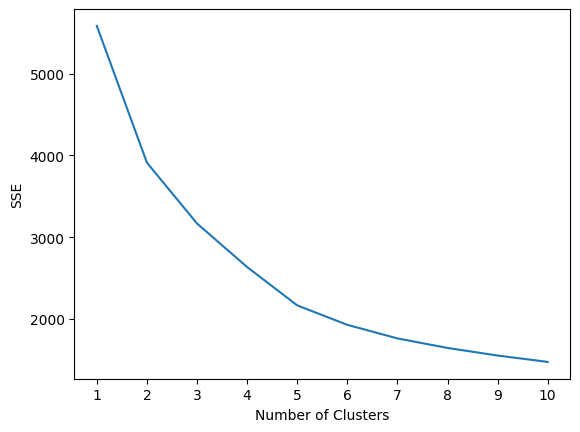

In [5]:
#Initisialise KMeans parameters
kmeans_kwargs = {
"init": "random",
"n_init":10,
"random_state":1,
}

#Create a list to hold SSE values for each K
sse = []
for k in range(1, 11):
    kmeans=  KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#Visualise the results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [16]:
#Use only two attributes of the housing data set to perform k-means
df = df[['price', 'numberrooms', 'TotalFloorArea', 'CURRENT_ENERGY_EFFICIENCY', 'year']]
#Create a KMeans clustering object with 5 clusters
kmeans= KMeans(n_clusters=5)
# Fit the data to the KMeans model
kmeans.fit(df)
# Get the cluster labels for each data point
labels= kmeans.labels_
centroids= kmeans.cluster_centers_

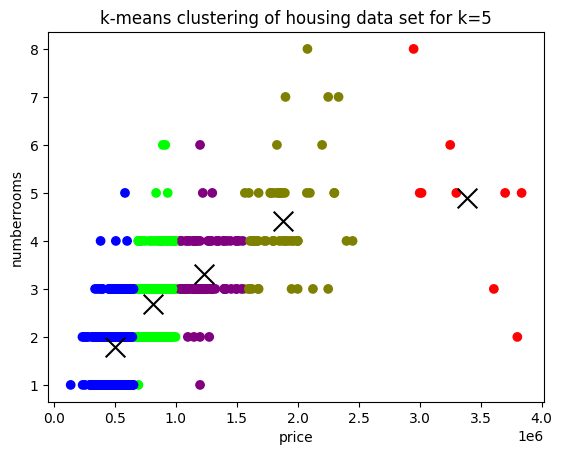

In [17]:
#Plot the results
plt.scatter(df['price'], df ['numberrooms'], c=labels, cmap='brg')
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=200, c='k')
plt.xlabel('price')
plt.ylabel('numberrooms')
plt.title('k-means clustering of housing data set for k=5')
plt.show()

In [18]:
print("Cluster Centroids:")
print(centroids)

Cluster Centroids:
[[5.03893004e+05 1.79926335e+00 4.52041915e+01 6.81049724e+01
  2.01660037e+03]
 [1.23203371e+06 3.30337079e+00 9.87276404e+01 6.60112360e+01
  2.01697753e+03]
 [3.38416667e+06 4.88888889e+00 1.92353333e+02 6.00000000e+01
  2.01633333e+03]
 [1.88221686e+06 4.41071429e+00 1.28089286e+02 6.04285714e+01
  2.01758929e+03]
 [8.14162095e+05 2.68333333e+00 7.04657664e+01 6.51190476e+01
  2.01719762e+03]]
